In [2]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

In [3]:
#Importing all images
list = []

from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('C:\\Users\\Felipe\\random_test') if isfile(join('C:\\Users\\Felipe\\random_test', f))]

for img in onlyfiles:
    list.append('C:\\Users\\Felipe\\random_test\\'+img)

    
img_data = []    
for img in list:
    try:
        img_array = cv2.imread(img)
        #img_array = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #imgGray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)     
        img_data.append(img_array)
    except Exception as e:
        pass


In [4]:
img = list[random.randint(0, 455)]

In [5]:
img

'C:\\Users\\Felipe\\random_test\\Venkatesan201861-Figure10-1.png'

In [6]:
name = img[img.rindex('\\')+1:]
name

'Venkatesan201861-Figure10-1.png'

In [7]:
print(len(img_data))
print(len(list))

445
445


In [8]:
#img_path='C:\\Users\\Felipe\\linear\\noncompound\\Rajendran201861-Figure15-1.png'

(400, 504, 3)


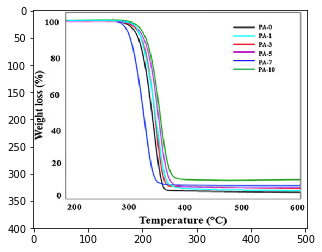

In [9]:
#Cargando la imagen

#img_array = cv2.imread(img_path, 0)
#imgGray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
#img_path = img_random
img_array = cv2.imread(img)
img_original = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
print(img_array.shape)

#plt.imshow(img_array, cmap = 'gray')
plt.imshow(img_original) # graph it
plt.show()

80
80
147.11904761904762


Text(0, 0.5, 'Promedio de los valores de esa fila')

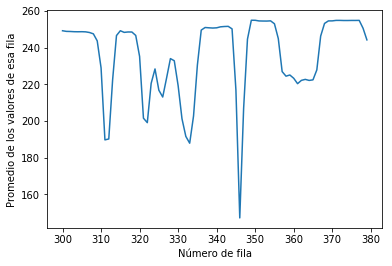

In [10]:
#Código para detectar dónde está el eje X (la línea del eje X)

#La mitad de la gráfica para abajo (de 187 a 374)
end = int(img_array.shape[0] - img_array.shape[0]*0.05)
height = img_array.shape[0]
half_height = int(3*height/4)

means = []
file = []
for i in range(half_height, end):
    calc = np.mean(img_array[i,:])
    means.append(calc)
    file.append(i)
    
dict = {}
for key, value in zip(means, file):
    dict[key] = value
    
print(len(means))
print(len(file))
linea = min(means)
print(linea)


plt.plot(file, means)
plt.xlabel('Número de fila')
plt.ylabel('Promedio de los valores de esa fila')


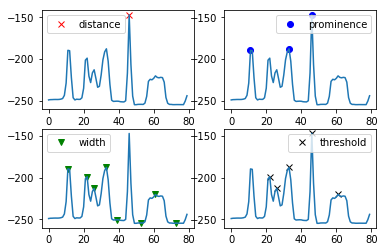

In [11]:
#Gráfico de la matriz inversa, para detectar los puntos más altos

import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import find_peaks

meansnp = np.array(means)
meansnp = meansnp*-1

#x = np.sin(2*np.pi*(2**np.linspace(2,10,1000))*np.arange(1000)/48000) + np.random.normal(0, 1, 1000) * 0.15
peaks, _ = find_peaks(meansnp, distance=60)
peaks2_x, _ = find_peaks(meansnp, prominence=40)      # BEST!
peaks3, _ = find_peaks(meansnp, width=2)
peaks4, _ = find_peaks(meansnp, threshold=1)     # Required vertical distance to its direct neighbouring samples, pretty useless
plt.subplot(2, 2, 1)
plt.plot(peaks, meansnp[peaks], "xr"); plt.plot(meansnp); plt.legend(['distance'])
plt.subplot(2, 2, 2)
plt.plot(peaks2_x, meansnp[peaks2_x], "ob"); plt.plot(meansnp); plt.legend(['prominence'])
plt.subplot(2, 2, 3)
plt.plot(peaks3, meansnp[peaks3], "vg"); plt.plot(meansnp); plt.legend(['width'])
plt.subplot(2, 2, 4)
plt.plot(peaks4, meansnp[peaks4], "xk"); plt.plot(meansnp); plt.legend(['threshold'])
plt.show()

In [12]:
#Sistema de calificación de cada punto

if peaks2_x.shape[0] > 1:

    #El borde de la derecha se llama columna_derecha
    index_x = []
    anomalies_x = meansnp[peaks2_x]*-1
    for i in anomalies_x:
        index_x.append(dict[i])

    #Cálculo de probabilidades
    minimo = min(anomalies_x)

    puntajes_altura = []
    for i in anomalies_x:
        puntaje = (minimo/i)*100
        puntajes_altura.append(puntaje)

    anom_list = anomalies_x.tolist()
    posiciones = []
    for i in anom_list:
        posiciones.append(anom_list.index(i) + 1)

    maximo = max(posiciones)

    puntajes_posiciones = []
    for i in posiciones:
        puntaje = (i/maximo)*100
        puntajes_posiciones.append(puntaje)

    #Promedio de puntajes
    puntajes_finales = []
    for i in range(0, len(puntajes_altura)):
        final = (0.6*puntajes_altura[i]) + (0.4*puntajes_posiciones[i])
        puntajes_finales.append(final)
    
    puntaje_maximo = max(puntajes_finales)
    indice = puntajes_finales.index(puntaje_maximo)
    
    ejex = dict[anomalies_x[indice]]
        
if peaks2_x.shape[0] == 1: 
    ejex = dict[linea]
    
if peaks2_x.shape[0] == 0:
    ejex = dict[linea]

In [13]:
ejex

346

101
101
153.58
La línea está ubicada en la columna: 60
Analizar hasta: 59


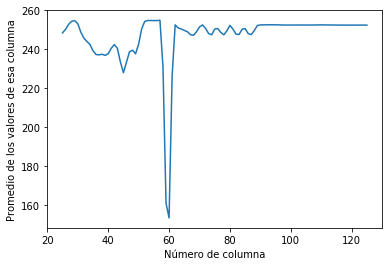

In [14]:
#Código para detectar dónde está el eje Y (la línea del eje Y)

#Establecer desde la izquierda de la imagen hasta el centro de la imagen
width = img_array.shape[1]
end = int(width/4)

start = int(img_array.shape[1] - img_array.shape[1]*0.95)
means_2 = []
col_2 = []

for i in range(start, end):
    
    calc = np.mean(img_array[:,i])
    means_2.append(calc)
    col_2.append(i)
    
    
dict_2 = {}
for key, value in zip(means_2, col_2):
    dict_2[key] = value
    
print(len(means_2))
print(len(col_2))
linea = min(means_2)
print(linea)
columna = dict_2[linea]


plt.plot(col_2, means_2)
plt.xlabel('Número de columna')
plt.ylabel('Promedio de los valores de esa columna')

print("La línea está ubicada en la columna: " + str(columna))
print("Analizar hasta: " + str(columna-1))

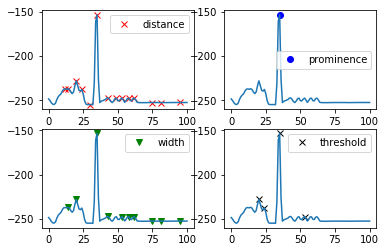

In [17]:
#Gráfico de la matriz inversa, para detectar los puntos más altos
meansnp = np.array(means_2)
meansnp = meansnp*-1

peaks, _ = find_peaks(meansnp, distance=2)
peaks2_der, _ = find_peaks(meansnp, prominence=40)      # BEST!
peaks3, _ = find_peaks(meansnp, width=2)
peaks4, _ = find_peaks(meansnp, threshold=1)     # Required vertical distance to its direct neighbouring samples, pretty useless
plt.subplot(2, 2, 1)
plt.plot(peaks, meansnp[peaks], "xr"); plt.plot(meansnp); plt.legend(['distance'])
plt.subplot(2, 2, 2)
plt.plot(peaks2, meansnp[peaks2], "ob"); plt.plot(meansnp); plt.legend(['prominence'])
plt.subplot(2, 2, 3)
plt.plot(peaks3, meansnp[peaks3], "vg"); plt.plot(meansnp); plt.legend(['width'])
plt.subplot(2, 2, 4)
plt.plot(peaks4, meansnp[peaks4], "xk"); plt.plot(meansnp); plt.legend(['threshold'])
plt.show()

In [18]:
#Sistema de calificación

if peaks2_der.shape[0] <= 1:

    columna = dict_2[linea]
        
if peaks2_der.shape[0] > 1:

    #El eje y se representa como columna
    index_der = []
    anomalies_der = meansnp[peaks2_der]*-1
    for i in anomalies_der:
        index_der.append(dict_2[i])

    #Cálculo de probabilidades
    minimo = min(anomalies_der)

    puntajes_altura = []
    for i in anomalies_der:
        puntaje = (minimo/i)*100
        puntajes_altura.append(puntaje)

    anom_list = anomalies_der.tolist()
    posiciones = []
    for i in anom_list:
        posiciones.append(anom_list.index(i) + 1)

    maximo = max(posiciones)

    puntajes_posiciones = []
    for i in posiciones:
        puntaje = (i/maximo)*100
        puntajes_posiciones.append(puntaje)

    #Promedio de puntajes
    puntajes_finales = []
    for i in range(0, len(puntajes_altura)):
        final = (0.6*puntajes_altura[i]) + (0.4*puntajes_posiciones[i])
        puntajes_finales.append(final)
    
    puntaje_maximo = max(puntajes_finales)
    indice = puntajes_finales.index(puntaje_maximo)
    
    columna_derecha = dict_2[anomalies_der[indice]]
        

168
168


Text(0, 0.5, 'Promedio de los valores de esa columna')

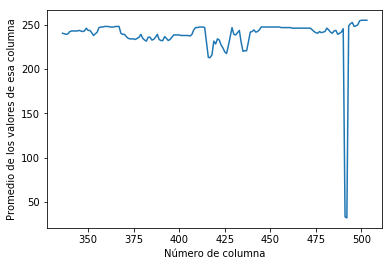

In [19]:
#Código para detectar dónde está el borde derecho de la imagen (si tiene)
#Establecer desde la derecha de la imagen hasta el centro de la imagen

img_array = cv2.imread(img)
gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
img_array = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

width = img_array.shape[1]
half_width = int(2*width/3)

end = int(width*0.95)
means_3 = []
file_3 = []

for i in range(half_width, width):
    
    calc = np.mean(img_array[:,i])
    means_3.append(calc)
    file_3.append(i)
    
    
dict_3 = {}
for key, value in zip(means_3, file_3):
    dict_3[key] = value
    
print(len(means_3))
print(len(file_3))
linea_3 = min(means_3)


plt.plot(file_3, means_3)
plt.xlabel('Número de columna')
plt.ylabel('Promedio de los valores de esa columna')

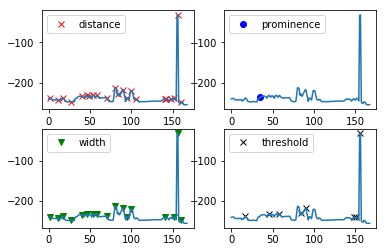

In [20]:
#Graficación de la matriz inversa

meansnp = np.array(means_3)
meansnp = meansnp*-1

peaks, _ = find_peaks(meansnp, distance=2)
peaks2_der, _ = find_peaks(meansnp, prominence=40)      # BEST!
peaks3, _ = find_peaks(meansnp, width=2)
peaks4, _ = find_peaks(meansnp, threshold=1)     # Required vertical distance to its direct neighbouring samples, pretty useless
plt.subplot(2, 2, 1)
plt.plot(peaks, meansnp[peaks], "xr"); plt.plot(meansnp); plt.legend(['distance'])
plt.subplot(2, 2, 2)
plt.plot(peaks2, meansnp[peaks2], "ob"); plt.plot(meansnp); plt.legend(['prominence'])
plt.subplot(2, 2, 3)
plt.plot(peaks3, meansnp[peaks3], "vg"); plt.plot(meansnp); plt.legend(['width'])
plt.subplot(2, 2, 4)
plt.plot(peaks4, meansnp[peaks4], "xk"); plt.plot(meansnp); plt.legend(['threshold'])
plt.show()

In [21]:
#Sistema de calificación

if peaks2_der.shape[0] == 0:
    
    if linea_3 > 100:
        columna_derecha = img_array.shape[1]
    else:
        columna_derecha = dict_3[linea_3]
        
if peaks2_der.shape[0] > 1:


    #El borde de la derecha se llama columna_derecha
    index_der = []
    anomalies_der = meansnp[peaks2_der]*-1
    for i in anomalies_der:
        index_der.append(dict_3[i])

    #Cálculo de probabilidades
    minimo = min(anomalies_der)

    puntajes_altura = []
    for i in anomalies_der:
        puntaje = (minimo/i)*100
        puntajes_altura.append(puntaje)

    anom_list = anomalies_der.tolist()
    posiciones = []
    for i in anom_list:
        posiciones.append(anom_list.index(i) + 1)

    maximo = max(posiciones)

    puntajes_posiciones = []
    for i in posiciones:
        puntaje = (i/maximo)*100
        puntajes_posiciones.append(puntaje)

    #Promedio de puntajes
    puntajes_finales = []
    for i in range(0, len(puntajes_altura)):
        final = (0.6*puntajes_altura[i]) + (0.4*puntajes_posiciones[i])
        puntajes_finales.append(final)
    
    puntaje_maximo = max(puntajes_finales)
    indice = puntajes_finales.index(puntaje_maximo)
    
    columna_derecha = dict_3[anomalies_der[indice]]
        
if peaks2_der.shape[0] == 1: 
    if linea_3 > 100:
        columna_derecha = img_array.shape[1]
    else:
        columna_derecha = dict_3[linea_3]

100
100
35.416666666666664


Text(0, 0.5, 'Promedio de los valores de esa fila')

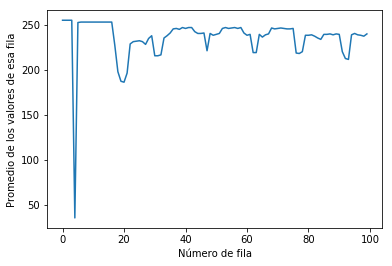

In [22]:
#Código para detectar dónde está el eje superior (si lo hay)

#La mitad de la gráfica para arriba
img_array = cv2.imread(img)
gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
img_array = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

height = img_array.shape[0]
half_height = int(1*height/4)

start = int(height*0.03)
means = []
file = []
for i in range(0, half_height):
    calc = np.mean(img_array[i,:])
    means.append(calc)
    file.append(i)
    
dict = {}
for key, value in zip(means, file):
    dict[key] = value
    
print(len(means))
print(len(file))
linea = min(means)
print(linea)


plt.plot(file, means)
plt.xlabel('Número de fila')
plt.ylabel('Promedio de los valores de esa fila')



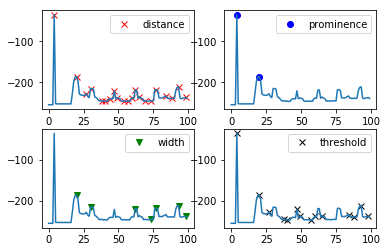

In [23]:
#Graficación de matriz inversa

meansnp = np.array(means)
meansnp = meansnp*-1

peaks, _ = find_peaks(meansnp, distance=2)
peaks2, _ = find_peaks(meansnp, prominence=40)      # BEST!
peaks3, _ = find_peaks(meansnp, width=2)
peaks4, _ = find_peaks(meansnp, threshold=1)     # Required vertical distance to its direct neighbouring samples, pretty useless
plt.subplot(2, 2, 1)
plt.plot(peaks, meansnp[peaks], "xr"); plt.plot(meansnp); plt.legend(['distance'])
plt.subplot(2, 2, 2)
plt.plot(peaks2, meansnp[peaks2], "ob"); plt.plot(meansnp); plt.legend(['prominence'])
plt.subplot(2, 2, 3)
plt.plot(peaks3, meansnp[peaks3], "vg"); plt.plot(meansnp); plt.legend(['width'])
plt.subplot(2, 2, 4)
plt.plot(peaks4, meansnp[peaks4], "xk"); plt.plot(meansnp); plt.legend(['threshold'])
plt.show()

In [24]:
#Sistema de calificación

if peaks2.shape[0] == 0:
    
    if linea > 100:
        fila_arriba = 0
    else:
        fila_arriba = dict[linea]
        

if peaks2.shape[0] > 1:

    #El borde de la derecha se llama columna_derecha
    index = []
    anomalies = meansnp[peaks2]*-1
    for i in anomalies:
        index.append(dict[i])

    #Cálculo de probabilidades
    minimo = min(anomalies)

    puntajes_altura = []
    for i in anomalies:
        puntaje = (minimo/i)*100
        puntajes_altura.append(puntaje)

    anom_list = anomalies.tolist()
    posiciones = []
    for i in anom_list:
        posiciones.append(anom_list.index(i) + 1)

    minimo_pos = max(posiciones)

    puntajes_posiciones = []
    for i in posiciones:
        puntaje = (minimo_pos/i)*100
        puntajes_posiciones.append(puntaje)

    #Promedio de puntajes
    puntajes_finales = []
    for i in range(0, len(puntajes_altura)):
        final = (0.6*puntajes_altura[i]) + (0.4*puntajes_posiciones[i])
        puntajes_finales.append(final)
    
    puntaje_maximo = max(puntajes_finales)
    indice = puntajes_finales.index(puntaje_maximo)
    
    fila_arriba = dict[anomalies[indice]]
        
if peaks2.shape[0] == 1: 
    if linea_3 > 100:
        fila_arriba = 0
    else:
        fila_arriba = dict[linea]

(400, 504, 3)


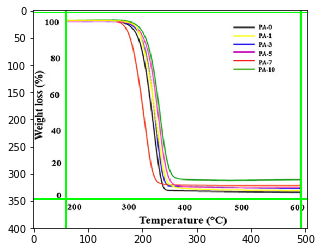

In [26]:
#Graficación de ejes
img_array = cv2.imread(img)
#imgGray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
print(img_array.shape)

#El orden es (columna, fila)

#Graficación del eje X
cv2.line(img_array, (0,ejex), (img_array.shape[1],ejex), (0, 255, 0), 2)

#Graficación del eje Y
cv2.line(img_array, (columna,0), (columna,img_array.shape[0]), (0, 255, 0), 2)

#Graficación del borde derecho

cv2.line(img_array, (columna_derecha,0), (columna_derecha,img_array.shape[0]), (0, 255, 0), 2)

#Graficación del borde superior

cv2.line(img_array, (0,fila_arriba), (img_array.shape[1],fila_arriba), (0, 255, 0), 2)
    
plt.imshow(img_array)
plt.show()

In [27]:
#Los colores se muestran en RGB, este código extrae los colores que detecta de la imagen
import extcolors
colors, pixel_count = extcolors.extract(img)

colors_list = []
for i in range(0, len(colors)):
    
    color = colors[i][0]
    colors_list.append(color)

In [94]:
colors_list

[(255, 255, 255),
 (50, 50, 50),
 (121, 126, 254),
 (48, 182, 86),
 (13, 255, 250),
 (1, 1, 1),
 (58, 50, 253),
 (239, 57, 65),
 (194, 45, 208),
 (25, 159, 22),
 (99, 9, 36),
 (25, 7, 12),
 (17, 16, 248),
 (39, 24, 1),
 (255, 15, 22)]

In [28]:
#En este bloque se crean unos límites inferiores y superiores para posteriormente
#crear una máscara que filtre cada color detectado, es decir, cada curva
low_ranges = []
c = 40

for h in range(0, len(colors_list)):

    color1 = colors_list[h][0] - c
    color2 = colors_list[h][1] - c
    color3 = colors_list[h][2] - c

#Si la resta da menos que cero, que se asigne 0
    if color1 < 0:
        color1 = 0
    if color2 < 0:
        color2 = 0
    if color3 < 0:
        color3 = 0
    
    low_ranges.append([color1, color2, color3])
    
upper_ranges = []
    
for h in range(0, len(colors_list)):

    color1 = colors_list[h][0] + c
    color2 = colors_list[h][1] + c
    color3 = colors_list[h][2] + c

#Si la suma da más de 255, que se asigne 255
    if color1 > 255:
        color1 = 255
    if color2 > 255:
        color2 =255
    if color3 > 255:
        color3 = 255
    
    upper_ranges.append([color1, color2, color3])    
    
    
low_ranges

[[215, 215, 215],
 [10, 10, 10],
 [81, 86, 214],
 [8, 142, 46],
 [0, 215, 210],
 [0, 0, 0],
 [18, 10, 213],
 [199, 17, 25],
 [154, 5, 168],
 [0, 119, 0],
 [59, 0, 0],
 [0, 0, 0],
 [0, 0, 208],
 [0, 0, 0],
 [215, 0, 0]]

In [29]:
#Creación de lista con los límites 
boundaries = []
for i in range(0, len(low_ranges)):
    boundaries.append((low_ranges[i], upper_ranges[i]))
boundaries

[([215, 215, 215], [255, 255, 255]),
 ([10, 10, 10], [90, 90, 90]),
 ([81, 86, 214], [161, 166, 255]),
 ([8, 142, 46], [88, 222, 126]),
 ([0, 215, 210], [53, 255, 255]),
 ([0, 0, 0], [41, 41, 41]),
 ([18, 10, 213], [98, 90, 255]),
 ([199, 17, 25], [255, 97, 105]),
 ([154, 5, 168], [234, 85, 248]),
 ([0, 119, 0], [65, 199, 62]),
 ([59, 0, 0], [139, 49, 76]),
 ([0, 0, 0], [65, 47, 52]),
 ([0, 0, 208], [57, 56, 255]),
 ([0, 0, 0], [79, 64, 41]),
 ([215, 0, 0], [255, 55, 62])]

(400, 504, 3)


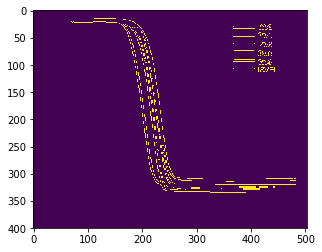

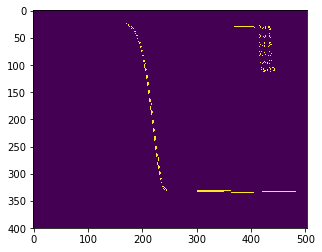

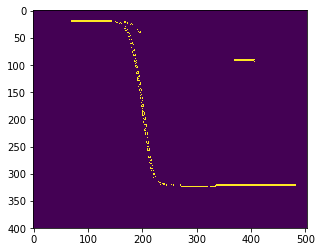

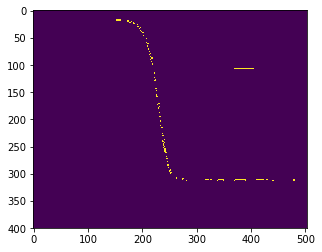

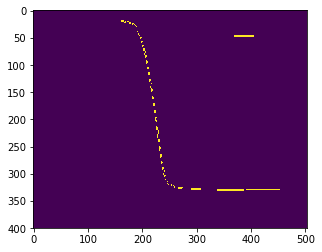

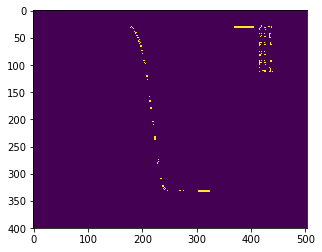

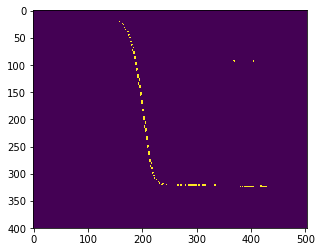

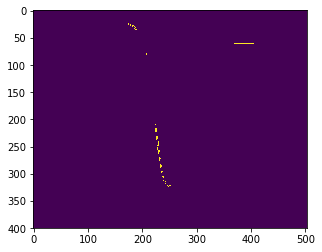

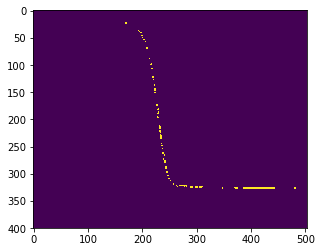

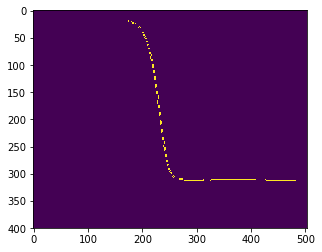

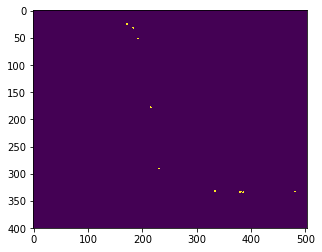

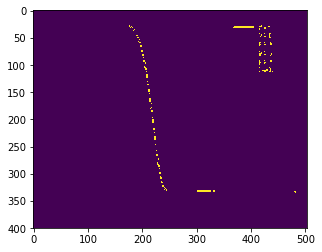

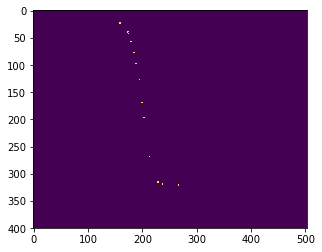

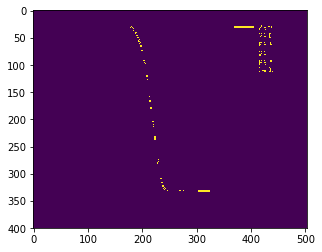

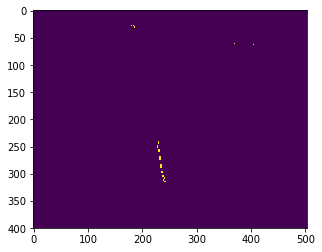

In [30]:
#Código que aplica las máscaras de colores, detecta bordes y dibuja las líneas

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    #channel_count = img_path.shape[2]
    match_mask_color = (255)
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    
    return masked_image


def drow_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(blank_image, (x1, y1), (x2, y2), (0, 255, 0), thickness=5)
    
        #Ahora se añaden las líneas a la imagen original
    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img


image = cv2.imread(img)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
n= 10
#columna, fila
  
region_of_interest_vertices = [
    (int(columna+n), int(ejex-n)),
    (int(columna+n), int(fila_arriba+n)),
    (int(columna_derecha-n), int(fila_arriba+n)),
    (int(columna_derecha-n), int(ejex-n))]


#Inicio del loop
cannies = []
name_image = []

for (lower, upper) in boundaries:
    # create NumPy arrays from the boundaries
    lower = np.array(lower, dtype="uint8")
    upper = np.array(upper, dtype="uint8")

    
    # find the colors within the specified boundaries
    mask = cv2.inRange(image, lower, upper)

    canny_image = cv2.Canny(mask, 50, 200)
    
    name_image.append(name)
    cropped_image = region_of_interest(canny_image, 
                                       np.array([region_of_interest_vertices], np.int32),)
    cannies.append(cropped_image)

    lines = cv2.HoughLinesP(cropped_image, 
                            rho=6, 
                            theta=np.pi/60, 
                            threshold=160, 
                            lines=np.array([]),
                            maxLineGap=25, 
                            minLineLength=100)

    image_with_lines = drow_the_lines(image, lines)

    #cv2.imshow("lines", image_with_lines)
    #cv2.imshow("cropped", cropped_image)
    plt.imshow(cropped_image)
    plt.show()
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()

In [31]:
h, j = np.where(cannies[1] == 255) # when comparing arrays of integers
h

array([ 24,  25,  26, ..., 335, 335, 335], dtype=int64)

In [32]:
cannies[1][6,68]

0

In [33]:

cannies[1][h[i], j[i]]

255

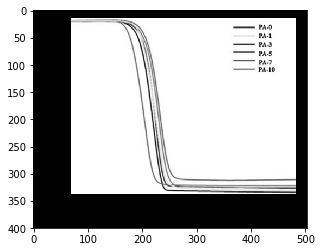

In [34]:
#Prueba de como queda segmentada la imagen
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cropped_image = region_of_interest(gray_image, 
                                   np.array([region_of_interest_vertices], np.int32),)
plt.imshow(cropped_image, cmap = 'gray')
plt.show()

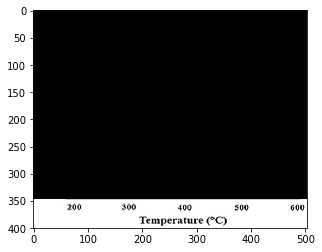

In [35]:
#Ahora se segmentará para que se detecte todo lo que esté debajo del eje X
n= 10
#columna, fila

region_of_interest_vertices = [
    (int(0), int(img_array.shape[0])),
    (int(0), int(ejex)),
    (int(img_array.shape[1]), int(ejex)),
    (int(img_array.shape[1]), int(img_array.shape[0]))]

gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
#canny_image = cv2.Canny(gray_image, 50, 200)
cropped_image_x = region_of_interest(gray_image, 
                                   np.array([region_of_interest_vertices], np.int32),)
 


plt.imshow(cropped_image_x, cmap = 'gray')
plt.show()

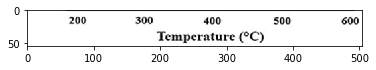

In [36]:
#Ahora se recortará para que se detecte todo lo que esté debajo del eje X

gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
#canny_image = cv2.Canny(gray_image, 50, 200)
cropped_image_x = gray_image[ejex:img_array.shape[0], 0:img_array.shape[1]]

##Resizing the image
#scale_percent = 220 # percent of original size
#width = int(cropped_image_x.shape[1] * scale_percent / 100)
#height = int(cropped_image_x.shape[0] * scale_percent / 100)
#dim = (width, height)

plt.imshow(cropped_image_x, cmap = 'gray')
plt.show()

32
32


Text(0, 0.5, 'Promedio de los valores de esa fila')

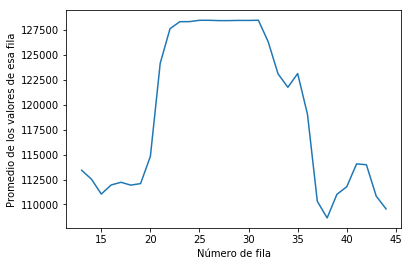

In [37]:
#Código para detectar el espacio de separación entre la leyenda del eje y los valores del eje

height = cropped_image_x.shape[0]
menor = height - height*0.75
mayor = height - height*0.15

means = []
file = []
for i in range(int(menor), int(mayor)):
    calc = np.sum(cropped_image_x[i,:])
    means.append(calc)
    file.append(i)
    
dict = {}
for key, value in zip(file, means):
    dict[key] = value
    
    
print(len(means))
print(len(file))
#valor = max(means)
#print(valor)
#def get_key(val): 
#    for key, value in dict.items(): 
#         if val == value: 
#             return key
#fila_new = get_key(valor)


plt.plot(file, means)
plt.xlabel('Número de fila')
plt.ylabel('Promedio de los valores de esa fila')


In [38]:
#Código para encontrar el punto medio entre ese espacio blanco de separación
import statistics
import heapq

lista_con_max = heapq.nlargest(3, means)
lista = []
for fila, suma in dict.items():
        for i in lista_con_max:
            if suma == i:
                lista.append(fila)
print(lista)
separacion_x = int(statistics.median(lista))
print(separacion_x)

[25, 25, 26, 26, 31]
26


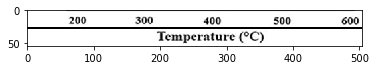

In [39]:
#Graficación de la línea de separación de los números y de la leyenda del eje X
if len(lista) <2:
    print("La imagen no tiene leyenda")

else:
    cropped_image_xcopy = cropped_image_x.copy()
    cv2.line(cropped_image_xcopy, (0,separacion_x), (img_array.shape[1],separacion_x), (0, 255, 0), 2)

    plt.imshow(cropped_image_xcopy, cmap = 'gray')
    plt.show()

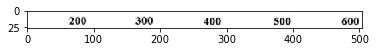

In [40]:
#Si el espacio es muy corto, significa que no hay leyenda en la imagen
if len(lista) <2:
    numbers = cropped_image_x

else:

    numbers = cropped_image_x[0:separacion_x, 0:img_array.shape[1]]
    
plt.imshow(numbers, cmap = 'gray')
plt.show()

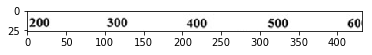

In [41]:
#Ahora específicamente solo los números
just_numbers = cropped_image_x[0:separacion_x, columna:columna_derecha]
plt.imshow(just_numbers, cmap = 'gray')
cv2.imwrite('./flip.png', just_numbers)
plt.show()

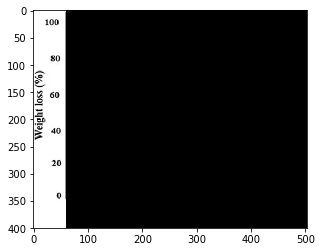

In [42]:
#Ahora se segmentará para que se detecte todo lo que esté a la izquierda del eje Y
n= 10
#columna, fila

region_of_interest_vertices = [
    (int(0), int(img_array.shape[0])),
    (int(0), int(0)),
    (int(columna), int(0)),
    (int(columna), int(img_array.shape[0]))]

gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
#canny_image = cv2.Canny(gray_image, 50, 200)
cropped_image_y = region_of_interest(gray_image, 
                                   np.array([region_of_interest_vertices], np.int32),)
 


plt.imshow(cropped_image_y, cmap = 'gray')
plt.show()

32
32


Text(0, 0.5, 'Promedio de los valores de esa columna')

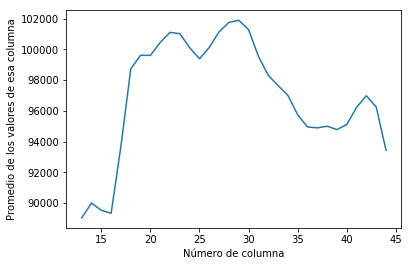

In [43]:
#Código para detectar el espacio de separación entre la leyenda del eje y los valores del eje

height = cropped_image_x.shape[0]
menor = height - height*0.75
mayor = height - height*0.15

means = []
file = []
for i in range(int(menor), int(mayor)):
    calc = np.sum(cropped_image_y[:,i])
    means.append(calc)
    file.append(i)
    
dict = {}
for key, value in zip(file, means):
    dict[key] = value
    
    
print(len(means))
print(len(file))
#valor = max(means)
#print(valor)
#def get_key(val): 
#    for key, value in dict.items(): 
#         if val == value: 
#             return key
#fila_new = get_key(valor)


plt.plot(file, means)
plt.xlabel('Número de columna')
plt.ylabel('Promedio de los valores de esa columna')


In [44]:
#Código para encontrar el punto medio entre ese espacio blanco de separación
import statistics
import heapq

lista_con_max = heapq.nlargest(3, means)
lista = []
for fila, suma in dict.items():
        for i in lista_con_max:
            if suma == i:
                lista.append(fila)
print(lista)
separacion_y = int(statistics.median(lista))
print(separacion_y)

[28, 29, 30]
29


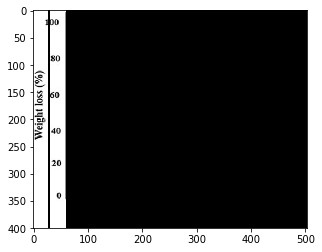

In [45]:
#Graficación de la línea de separación de los números y de la leyenda del eje X
if len(lista) <2:
    print("La imagen no tiene leyenda")

    #columna, fila
else:
    cropped_image_ycopy = cropped_image_y.copy()
    cv2.line(cropped_image_ycopy, (separacion_y, img_array.shape[0]), (separacion_y, 0), (0, 255, 0), 2)

    plt.imshow(cropped_image_ycopy, cmap = 'gray')
    plt.show()

In [46]:
#Dataframe con las predicciones hechas con la API de Google
import pandas as pd
unpickled_df = pd.read_pickle("C:/Users/Felipe/Downloads/dummy.pkl")
unpickled_df

,value,v1,v2,v3,v4,img_name
0,13-,"[29, 1]","[44, 1]","[44, 13]","[29, 13]",Mondal201357-Figure5-1.png
1,12-,"[29, 43]","[57, 43]","[57, 60]","[29, 60]",Mondal201357-Figure5-1.png
2,11,"[29, 88]","[42, 88]","[42, 100]","[29, 100]",Mondal201357-Figure5-1.png
3,10-,"[27, 129]","[48, 129]","[48, 146]","[27, 146]",Mondal201357-Figure5-1.png
4,8,"[37, 219]","[44, 219]","[44, 231]","[37, 231]",Mondal201357-Figure5-1.png
5,7wt%,"[426, 369]","[465, 370]","[465, 384]","[426, 383]",Mondal201357-Figure5-1.png
6,Owt%,"[92, 370]","[131, 370]","[131, 382]","[92, 382]",Mondal201357-Figure5-1.png
7,3wt%,"[203, 370]","[242, 370]","[242, 382]","[203, 382]",Mondal201357-Figure5-1.png
8,5wt%,"[315, 370]","[353, 370]","[353, 382]","[315, 382]",Mondal201357-Figure5-1.png
9,MMT,"[194, 399]","[230, 400]","[230, 413]","[194, 412]",Mondal201357-Figure5-1.png


In [47]:
name

'Venkatesan201861-Figure10-1.png'

In [48]:
#Seleccionando los valores correspondientes a la imagen en cuestion
selection = unpickled_df[unpickled_df['img_name'] == name]
selection

,value,v1,v2,v3,v4,img_name
7972,100,"[22, 16]","[46, 15]","[46, 26]","[22, 27]",Venkatesan201861-Figure10-1.png
7973,PA-0,"[415, 27]","[439, 27]","[439, 35]","[415, 35]",Venkatesan201861-Figure10-1.png
7974,PA-1,"[415, 43]","[438, 43]","[438, 51]","[415, 51]",Venkatesan201861-Figure10-1.png
7975,PA-3,"[415, 59]","[438, 59]","[438, 67]","[415, 67]",Venkatesan201861-Figure10-1.png
7976,PA-5,"[415, 76]","[439, 76]","[439, 84]","[415, 84]",Venkatesan201861-Figure10-1.png
7977,80,"[34, 79]","[55, 83]","[52, 99]","[31, 96]",Venkatesan201861-Figure10-1.png
7978,PA-7,"[415, 91]","[438, 90]","[438, 99]","[415, 100]",Venkatesan201861-Figure10-1.png
7979,PA-10,"[415, 100]","[444, 101]","[443, 115]","[415, 114]",Venkatesan201861-Figure10-1.png
7980,40,"[34, 216]","[50, 216]","[50, 226]","[34, 226]",Venkatesan201861-Figure10-1.png
7981,20,"[35, 276]","[51, 276]","[51, 286]","[35, 286]",Venkatesan201861-Figure10-1.png


In [49]:
#Extrayendo los valores de los vertices del dataframe

#df['C'] = df['A'] + df['B'].apply(lambda x:x[1])
v1_ar = selection['v1'].apply(lambda x:x[0]).values
v2_ar = selection['v2'].apply(lambda x:x[0]).values
v3_ar = selection['v3'].apply(lambda x:x[1]).values
v2_2 = selection['v2'].apply(lambda x:x[1]).values

In [50]:
selection['v2'].apply(lambda x:x[1]).values[0]

15

In [51]:
#Calculando el centroide de cada vertice
centroides = []
for i in range(len(v1_ar)):
    centroide_x = (v2_ar[i] - v1_ar[i])/2 + v1_ar[i]
    centroide_y = (v3_ar[i] - v2_2[i])/2 + v2_2[i] 
    centroides.append([centroide_x, centroide_y])

In [52]:
centroides

[[34.0, 20.5],
 [427.0, 31.0],
 [426.5, 47.0],
 [426.5, 63.0],
 [427.0, 80.0],
 [44.5, 91.0],
 [426.5, 94.5],
 [429.5, 108.0],
 [42.0, 221.0],
 [43.0, 281.0],
 [76.0, 360.5],
 [176.0, 361.5],
 [278.5, 361.5],
 [383.5, 362.0],
 [485.5, 362.0],
 [253.5, 386.5],
 [337.0, 386.5],
 [2.0, 181.0],
 [2.0, 146.0],
 [2.0, 111.0]]

In [53]:
#Valores límites

print(ejex) #Es el valor en y (empezando desde arriba de la imagen)
print(columna) #Es el valor en x (empezando desde la parte izquierda)
print(separacion_x)
print(separacion_y)

346
60
26
29


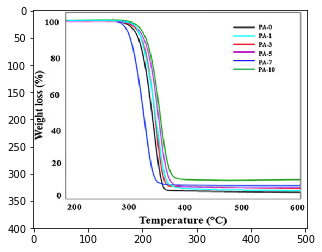

In [54]:
#Grafica en cucestión
plt.imshow(img_original) # graph it
plt.show()

In [58]:
centroides_x = []
for i in range(len(centroides)):
    centroides_x.append(centroides[i][0])
    
centroides_y = []
for i in range(len(centroides)):


In [60]:
#Determinando el rol de cada elemento detectado por la API de Google según los valores límites

#Mis variables son: ejex, columna (eje Y), columna_derecha (borde derecho), fila_arriba
rol = []
for i in centroides:
    if i[0] <= separacion_y:
        print(i[0])
        rol.append('leyenda_y')
    elif i[0] < columna and i[0] >= separacion_y:
        print(i[0])
        rol.append('valor_y')
    elif i[1] >= (separacion_x + ejex):
        print(i[1])
        rol.append('leyenda_x')
    elif i[1] >= ejex and i[1] < separacion_x + ejex and i[0] > columna:
        print(i[0])
        print(i[1])
        rol.append('valor_x')
    else:
        rol.append('sin_rol')
        print(i[0])

34.0
427.0
426.5
426.5
427.0
44.5
426.5
429.5
42.0
43.0
76.0
360.5
176.0
361.5
278.5
361.5
383.5
362.0
485.5
362.0
386.5
386.5
2.0
2.0
2.0


In [61]:
rol

['valor_y',
 'sin_rol',
 'sin_rol',
 'sin_rol',
 'sin_rol',
 'valor_y',
 'sin_rol',
 'sin_rol',
 'valor_y',
 'valor_y',
 'valor_x',
 'valor_x',
 'valor_x',
 'valor_x',
 'valor_x',
 'leyenda_x',
 'leyenda_x',
 'leyenda_y',
 'leyenda_y',
 'leyenda_y']

In [62]:
#Convirtiendo los centroides y su rol a series de Pandas para posteriormente unir al dataframe
centroides_x_pd = pd.Series(centroides_x) 
centroides_y_pd = pd.Series(centroides_y)
rol_pd = pd.Series(rol)

df = pd.concat([centroides_x_pd,
        centroides_y_pd,
        rol_pd], axis=1)

df.columns=['centroides_x', 'centroides_y', 'rol']
print(df)

    centroides_x  centroides_y        rol
0           34.0          20.5    valor_y
1          427.0          31.0    sin_rol
2          426.5          47.0    sin_rol
3          426.5          63.0    sin_rol
4          427.0          80.0    sin_rol
5           44.5          91.0    valor_y
6          426.5          94.5    sin_rol
7          429.5         108.0    sin_rol
8           42.0         221.0    valor_y
9           43.0         281.0    valor_y
10          76.0         360.5    valor_x
11         176.0         361.5    valor_x
12         278.5         361.5    valor_x
13         383.5         362.0    valor_x
14         485.5         362.0    valor_x
15         253.5         386.5  leyenda_x
16         337.0         386.5  leyenda_x
17           2.0         181.0  leyenda_y
18           2.0         146.0  leyenda_y
19           2.0         111.0  leyenda_y


In [63]:
#Creando un solo dataframe
df_final = selection.join(df.set_index(selection.index))
df_final

,value,v1,v2,v3,v4,img_name,centroides_x,centroides_y,rol
7972,100,"[22, 16]","[46, 15]","[46, 26]","[22, 27]",Venkatesan201861-Figure10-1.png,34.0,20.5,valor_y
7973,PA-0,"[415, 27]","[439, 27]","[439, 35]","[415, 35]",Venkatesan201861-Figure10-1.png,427.0,31.0,sin_rol
7974,PA-1,"[415, 43]","[438, 43]","[438, 51]","[415, 51]",Venkatesan201861-Figure10-1.png,426.5,47.0,sin_rol
7975,PA-3,"[415, 59]","[438, 59]","[438, 67]","[415, 67]",Venkatesan201861-Figure10-1.png,426.5,63.0,sin_rol
7976,PA-5,"[415, 76]","[439, 76]","[439, 84]","[415, 84]",Venkatesan201861-Figure10-1.png,427.0,80.0,sin_rol
7977,80,"[34, 79]","[55, 83]","[52, 99]","[31, 96]",Venkatesan201861-Figure10-1.png,44.5,91.0,valor_y
7978,PA-7,"[415, 91]","[438, 90]","[438, 99]","[415, 100]",Venkatesan201861-Figure10-1.png,426.5,94.5,sin_rol
7979,PA-10,"[415, 100]","[444, 101]","[443, 115]","[415, 114]",Venkatesan201861-Figure10-1.png,429.5,108.0,sin_rol
7980,40,"[34, 216]","[50, 216]","[50, 226]","[34, 226]",Venkatesan201861-Figure10-1.png,42.0,221.0,valor_y
7981,20,"[35, 276]","[51, 276]","[51, 286]","[35, 286]",Venkatesan201861-Figure10-1.png,43.0,281.0,valor_y


In [64]:
#Extrayendo solo valores que se consideraron como valores del eje X

valor_x_df = df_final[df_final['rol'] == 'valor_x']
valor_x_df

,value,v1,v2,v3,v4,img_name,centroides_x,centroides_y,rol
7982,200,"[64, 355]","[88, 355]","[88, 366]","[64, 366]",Venkatesan201861-Figure10-1.png,76.0,360.5,valor_x
7983,300,"[163, 355]","[189, 356]","[189, 367]","[163, 366]",Venkatesan201861-Figure10-1.png,176.0,361.5,valor_x
7984,400,"[266, 356]","[291, 356]","[291, 367]","[266, 367]",Venkatesan201861-Figure10-1.png,278.5,361.5,valor_x
7985,500,"[371, 357]","[396, 357]","[396, 367]","[371, 367]",Venkatesan201861-Figure10-1.png,383.5,362.0,valor_x
7986,600,"[473, 357]","[498, 357]","[498, 367]","[473, 367]",Venkatesan201861-Figure10-1.png,485.5,362.0,valor_x


In [65]:
#Limpiando los valores de caracteres indeseados
valor_x_df = valor_x_df[~valor_x_df['value'].isin(['*','/','.', ','])]
valor_x_df['value'].filter(regex=r'^[.,0-9]+$')
valor_x_df

,value,v1,v2,v3,v4,img_name,centroides_x,centroides_y,rol
7982,200,"[64, 355]","[88, 355]","[88, 366]","[64, 366]",Venkatesan201861-Figure10-1.png,76.0,360.5,valor_x
7983,300,"[163, 355]","[189, 356]","[189, 367]","[163, 366]",Venkatesan201861-Figure10-1.png,176.0,361.5,valor_x
7984,400,"[266, 356]","[291, 356]","[291, 367]","[266, 367]",Venkatesan201861-Figure10-1.png,278.5,361.5,valor_x
7985,500,"[371, 357]","[396, 357]","[396, 367]","[371, 367]",Venkatesan201861-Figure10-1.png,383.5,362.0,valor_x
7986,600,"[473, 357]","[498, 357]","[498, 367]","[473, 367]",Venkatesan201861-Figure10-1.png,485.5,362.0,valor_x


In [66]:
#Limpiando
import re
valor_x_list = valor_x_df['value'].tolist()
valor_x_clean = []
for i in valor_x_list:
    if bool(re.search(r'[0-9,.]+-', i)) == True:
        new = i.rsplit('-', 1)[0]
        valor_x_clean.append(new)
valor_x_clean
if len(valor_x_clean) == 0:
    final_x = [float(i) for i in valor_x_list]
else:
    final_x = [float(i) for i in valor_x_clean] 
final_x


[200.0, 300.0, 400.0, 500.0, 600.0]

In [67]:
#Reemplazando valores originales por valores limpiados

final_x_pd = pd.Series(final_x)
valor_x_df = valor_x_df.assign(value=final_x_pd.values)
valor_x_df

,value,v1,v2,v3,v4,img_name,centroides_x,centroides_y,rol
7982,200.0,"[64, 355]","[88, 355]","[88, 366]","[64, 366]",Venkatesan201861-Figure10-1.png,76.0,360.5,valor_x
7983,300.0,"[163, 355]","[189, 356]","[189, 367]","[163, 366]",Venkatesan201861-Figure10-1.png,176.0,361.5,valor_x
7984,400.0,"[266, 356]","[291, 356]","[291, 367]","[266, 367]",Venkatesan201861-Figure10-1.png,278.5,361.5,valor_x
7985,500.0,"[371, 357]","[396, 357]","[396, 367]","[371, 367]",Venkatesan201861-Figure10-1.png,383.5,362.0,valor_x
7986,600.0,"[473, 357]","[498, 357]","[498, 367]","[473, 367]",Venkatesan201861-Figure10-1.png,485.5,362.0,valor_x


In [68]:
#Extrayendo los valores finales para la interpolación y escalado
x_list = np.array(valor_x_df['value'].tolist())
diff_x = np.mean(np.diff(x_list))
print(diff_x)

cen_x = np.array(valor_x_df['centroides_x'].tolist())
diff_cen = np.mean(np.diff(cen_x))
print(diff_cen)

factor_x = diff_x/diff_cen
print("Valor por pixel: " + str(factor_x))

100.0
102.375
Valor por pixel: 0.9768009768009768


In [69]:
#Extrayendo solo valores del eje Y
valor_y_df = df_final[df_final['rol'] == 'valor_y']
valor_y_df

,value,v1,v2,v3,v4,img_name,centroides_x,centroides_y,rol
7972,100,"[22, 16]","[46, 15]","[46, 26]","[22, 27]",Venkatesan201861-Figure10-1.png,34.0,20.5,valor_y
7977,80,"[34, 79]","[55, 83]","[52, 99]","[31, 96]",Venkatesan201861-Figure10-1.png,44.5,91.0,valor_y
7980,40,"[34, 216]","[50, 216]","[50, 226]","[34, 226]",Venkatesan201861-Figure10-1.png,42.0,221.0,valor_y
7981,20,"[35, 276]","[51, 276]","[51, 286]","[35, 286]",Venkatesan201861-Figure10-1.png,43.0,281.0,valor_y


In [70]:
#limpiando valores del eje Y
valor_y_df = valor_y_df[~valor_y_df['value'].isin(['*','/','.', ',', '-'])]
valor_y_df =  valor_y_df[~valor_y_df['value'].str.contains('[A-Za-z]')]
#valor_y_df['value'].filter(regex=r'^[.,0-9]+$')
valor_y_df

,value,v1,v2,v3,v4,img_name,centroides_x,centroides_y,rol
7972,100,"[22, 16]","[46, 15]","[46, 26]","[22, 27]",Venkatesan201861-Figure10-1.png,34.0,20.5,valor_y
7977,80,"[34, 79]","[55, 83]","[52, 99]","[31, 96]",Venkatesan201861-Figure10-1.png,44.5,91.0,valor_y
7980,40,"[34, 216]","[50, 216]","[50, 226]","[34, 226]",Venkatesan201861-Figure10-1.png,42.0,221.0,valor_y
7981,20,"[35, 276]","[51, 276]","[51, 286]","[35, 286]",Venkatesan201861-Figure10-1.png,43.0,281.0,valor_y


In [71]:
#Limpiando valores
valor_y_list = valor_y_df['value'].tolist()
valor_y_clean = []
for i in valor_y_list:
    if bool(re.search(r'[0-9,.]+-', i)) == True:
        new = i.rsplit('-', 1)[0]
        valor_y_clean.append(new)
    else:
        if bool(re.search('[a-zA-Z]', i)):
            pass
        else:
            valor_y_clean.append(i)

if len(valor_y_clean) == 0:
    final_y = [float(i) for i in valor_y_list]
else:
    final_y = [float(i) for i in valor_y_clean]

final_y

[100.0, 80.0, 40.0, 20.0]

In [72]:
y_list = np.array(valor_y_df['value'].tolist())
diff_y = np.absolute(np.mean(np.diff(final_y)))
print(diff_y)

cen_y = np.array(valor_y_df['centroides_y'].tolist())
diff_cen = np.absolute(np.mean(np.diff(cen_y)))
print(diff_cen)

26.666666666666668
86.83333333333333


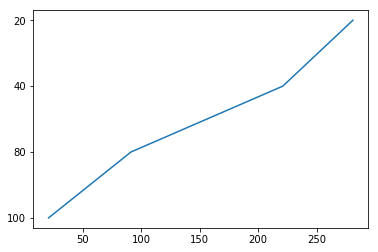

array(35.5)

In [73]:
#Interpolando con Scikitlearn
from scipy import interpolate
import matplotlib.pyplot as plt

f = interpolate.interp1d(cen_y, y_list)
plt.plot(cen_y, y_list)
plt.show()

valor_real = f(234.5)
valor_real

In [74]:
#En "indices" se guardarán los pixeles donde está la segunda curva detectada (cannies[1])
indices = np.where(cannies[1] != 0) # when comparing arrays of integers

In [75]:
#Este output representa el número de curvas que se detectaron con canny edges
len(cannies)

15

In [76]:
j, h = indices

In [77]:
j

array([ 24,  25,  26, ..., 335, 335, 335], dtype=int64)

In [78]:
#Interpolación para valores del eje Y
j_inter = []
f = interpolate.interp1d(cen_y, y_list, fill_value="extrapolate")
for i in j:
    j_inter.append(f(i))
j_inter

[array(99.0070922),
 array(98.72340426),
 array(98.43971631),
 array(98.43971631),
 array(98.43971631),
 array(98.15602837),
 array(98.15602837),
 array(98.15602837),
 array(98.15602837),
 array(97.87234043),
 array(97.87234043),
 array(97.87234043),
 array(97.87234043),
 array(97.87234043),
 array(97.87234043),
 array(97.58865248),
 array(97.58865248),
 array(97.58865248),
 array(97.58865248),
 array(97.58865248),
 array(97.58865248),
 array(97.58865248),
 array(97.58865248),
 array(97.58865248),
 array(97.58865248),
 array(97.58865248),
 array(97.30496454),
 array(97.30496454),
 array(97.30496454),
 array(97.30496454),
 array(97.30496454),
 array(97.30496454),
 array(97.30496454),
 array(97.30496454),
 array(97.30496454),
 array(97.30496454),
 array(97.30496454),
 array(97.30496454),
 array(97.30496454),
 array(97.30496454),
 array(97.30496454),
 array(97.30496454),
 array(97.30496454),
 array(97.30496454),
 array(97.30496454),
 array(97.30496454),
 array(97.30496454),
 array(97.3049

In [79]:
#H representa el array con los valores sin interpolar 
h

array([171, 170, 174, ..., 469, 470, 471], dtype=int64)

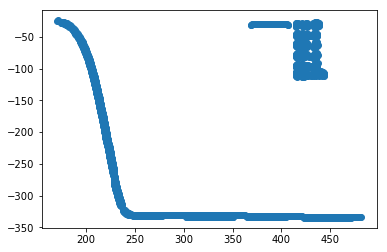

In [80]:
#EL problema está en que Opencv lee las imágenes al revés (en alto)
plt.scatter(h, j*-1)
plt.show()

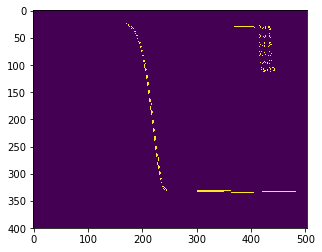

In [81]:
#La curva específica que se intenta extraer
plt.imshow(cannies[1])
plt.show()

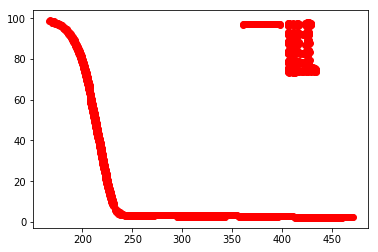

In [91]:
#La curva extraída con los ejes ya escalados
plt.plot(h*factor_x, j_inter, 'ro')
plt.show()

In [92]:
factor_x

0.9768009768009768

In [83]:
#Carga del diccionario que contiene el título de cada figura (Esto se obtuvo con pdffigures2)
import pickle
with open('C:\\Users\\Felipe\\datos\\datos\\filename.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [84]:
b

{'10.1002_adfm.200701077-Figure7-1.png': 'Figure 7. Simulated linear relationship between the dielectric permittivity of the BaTiO3/PI composite films on the volume concentration of BaTiO3 at a frequency of a) 10 3, b) 104, c) 105, and d) 106Hz.',
 '10.1002_adfm.200701077-Figure9-1.png': 'Figure 9. Temperature dependence of a) dielectric permittivity and b) TGA and DSC curves of a BaTiO3/PI composite with a BaTiO3 loading of 40 vol%.',
 '10.1002_adfm.200701077-Figure2-1.png': 'Figure 2. Cross-section TEM image of a BaTiO3/PI composite film obtained by in-situ polymerization with a BaTiO3 loading of 40 vol%.',
 '10.1002_adfm.201500332-Figure1-1.png': 'Figure 1. a) XRD patterns of unetched and etched STCu thin fi lms deposited at 650 °C substrate temperature and in vacuum (2 × 10 −6 Torr). Inset is a magnifi ed XRD pattern around the nc-STCu perovskite (004) peak before and after etching. b) High resolution XPS spectrum of the Cu2p core level in an nc-STCu fi lm grown at high vacuum. c) 

In [85]:
#Recuperación de la leyenda, según el rol detectado
legend_x = df_final[df_final['rol'] == "leyenda_x"]
legends_x_list = np.array(legend_x['value'].tolist())
try:
    legends_x = ' '.join(legends_x_list)
    legends_x
except Exception as e:
    leyends_x = 'Sin leyenda'

In [86]:
#Recuperación de la leyenda, según el rol detectado
legend_y = df_final[df_final['rol'] == "leyenda_y"]
legends_y_list = np.array(legend_y['value'].tolist())
if len(legends_y_list) >= 1:
    ly = ' '.join(legends_y_list)
else:
    ly= 'Sin leyenda'

In [87]:
ly

'Weight loss (%)'

In [105]:
#Creación de tuple con el color que se extrajo para este específico ejemplo
colors_tuple = tuple(ti/255 for ti in colors_list[1])
print(colors_tuple)

(0.19607843137254902, 0.19607843137254902, 0.19607843137254902)


[Text(0, 0.5, 'Weight loss (%)'),
 Text(0.5, 0, 'Temperature (°C)'),
 Text(0.5, 1.0, 'FIGURE 10 Thermogravimetric analysis curves of poly (butylene adipate‐co‐terephthalate) and poly (butylene adipate‐co‐terephthalate)/ silver oxide nanocomposites with 1 to 10 wt% silver oxide nanoparticles [Colour figure can be viewed at wileyonlinelibrary.com]')]

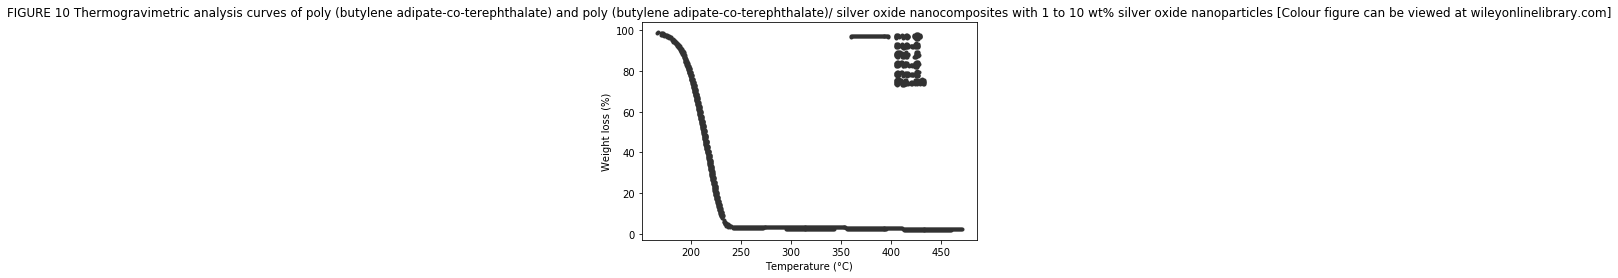

In [108]:
#Graficación de figura con valores escalados, el color de la curva que se extrajo, las leyendas detectadas y el título detectado
fig, ax = plt.subplots()
ax.scatter(h*factor_x,j_inter,marker=".", facecolor=colors_tuple)
#ax.plot(h*factor_x,j_inter,marker="o")
ax.set(title=b[name],
ylabel=ly,
xlabel=legends_x)

<function matplotlib.pyplot.show(*args, **kw)>

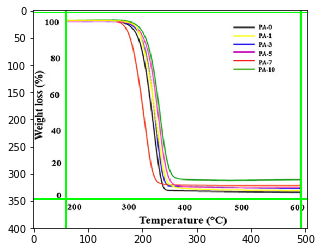

In [89]:
#Imagen original
plt.imshow(img_array)
plt.show